In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
train_data=pd.read_csv("TRAIN.csv")

In [3]:
test_data=pd.read_csv("TEST.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26149 entries, 0 to 26148
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idx                     26149 non-null  int64  
 1   UNIXTime                26149 non-null  int64  
 2   Data                    26149 non-null  object 
 3   Time                    26149 non-null  object 
 4   Radiation               26149 non-null  float64
 5   Temperature             26149 non-null  int64  
 6   Pressure                26149 non-null  float64
 7   Humidity                26149 non-null  int64  
 8   WindDirection(Degrees)  26149 non-null  float64
 9   Speed                   26149 non-null  float64
 10  TimeSunRise             26149 non-null  object 
 11  TimeSunSet              26149 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 2.0+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6537 entries, 0 to 6536
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idx                     6537 non-null   int64  
 1   UNIXTime                6537 non-null   int64  
 2   Data                    6537 non-null   object 
 3   Time                    6537 non-null   object 
 4   Temperature             6537 non-null   int64  
 5   Pressure                6537 non-null   float64
 6   Humidity                6537 non-null   int64  
 7   WindDirection(Degrees)  6537 non-null   float64
 8   Speed                   6537 non-null   float64
 9   TimeSunRise             6537 non-null   object 
 10  TimeSunSet              6537 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 459.7+ KB


In [6]:
test_data.head()

,idx,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1482775250,12/26/2016 12:00:00 AM,08:00:50,48,30.47,101,187.78,4.50,06:55:00,17:51:00
1,1,1482774940,12/26/2016 12:00:00 AM,07:55:40,48,30.47,101,133.40,10.12,06:55:00,17:51:00
2,2,1482774649,12/26/2016 12:00:00 AM,07:50:49,48,30.47,101,160.69,5.62,06:55:00,17:51:00
3,3,1482774351,12/26/2016 12:00:00 AM,07:45:51,48,30.47,101,144.56,7.87,06:55:00,17:51:00
4,4,1482774039,12/26/2016 12:00:00 AM,07:40:39,48,30.47,101,169.05,10.12,06:55:00,17:51:00


In [7]:
train_data.head()

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1480107904,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00
1,1,1472818508,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00
2,2,1475804719,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00
3,3,1482533149,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00
4,4,1481883019,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00


In [61]:
train_data.drop(["Data","Time","TimeSunRise","TimeSunSet"],inplace=True,axis=1)

KeyError: "['Data' 'Time' 'TimeSunRise' 'TimeSunSet'] not found in axis"

In [9]:
test_data.drop(["Data","Time","TimeSunRise","TimeSunSet"],inplace=True,axis=1)

In [10]:
train_data.head()

,idx,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,0,1480107904,288.44,46,30.48,101,129.84,13.50
1,1,1472818508,2.79,50,30.42,75,173.90,6.75
2,2,1475804719,118.05,54,30.42,100,7.35,1.12
3,3,1482533149,853.17,58,30.44,57,81.67,11.25
4,4,1481883019,1.24,42,30.24,103,171.13,2.25


In [11]:
test_data.head()

,idx,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,0,1482775250,48,30.47,101,187.78,4.50
1,1,1482774940,48,30.47,101,133.40,10.12
2,2,1482774649,48,30.47,101,160.69,5.62
3,3,1482774351,48,30.47,101,144.56,7.87
4,4,1482774039,48,30.47,101,169.05,10.12


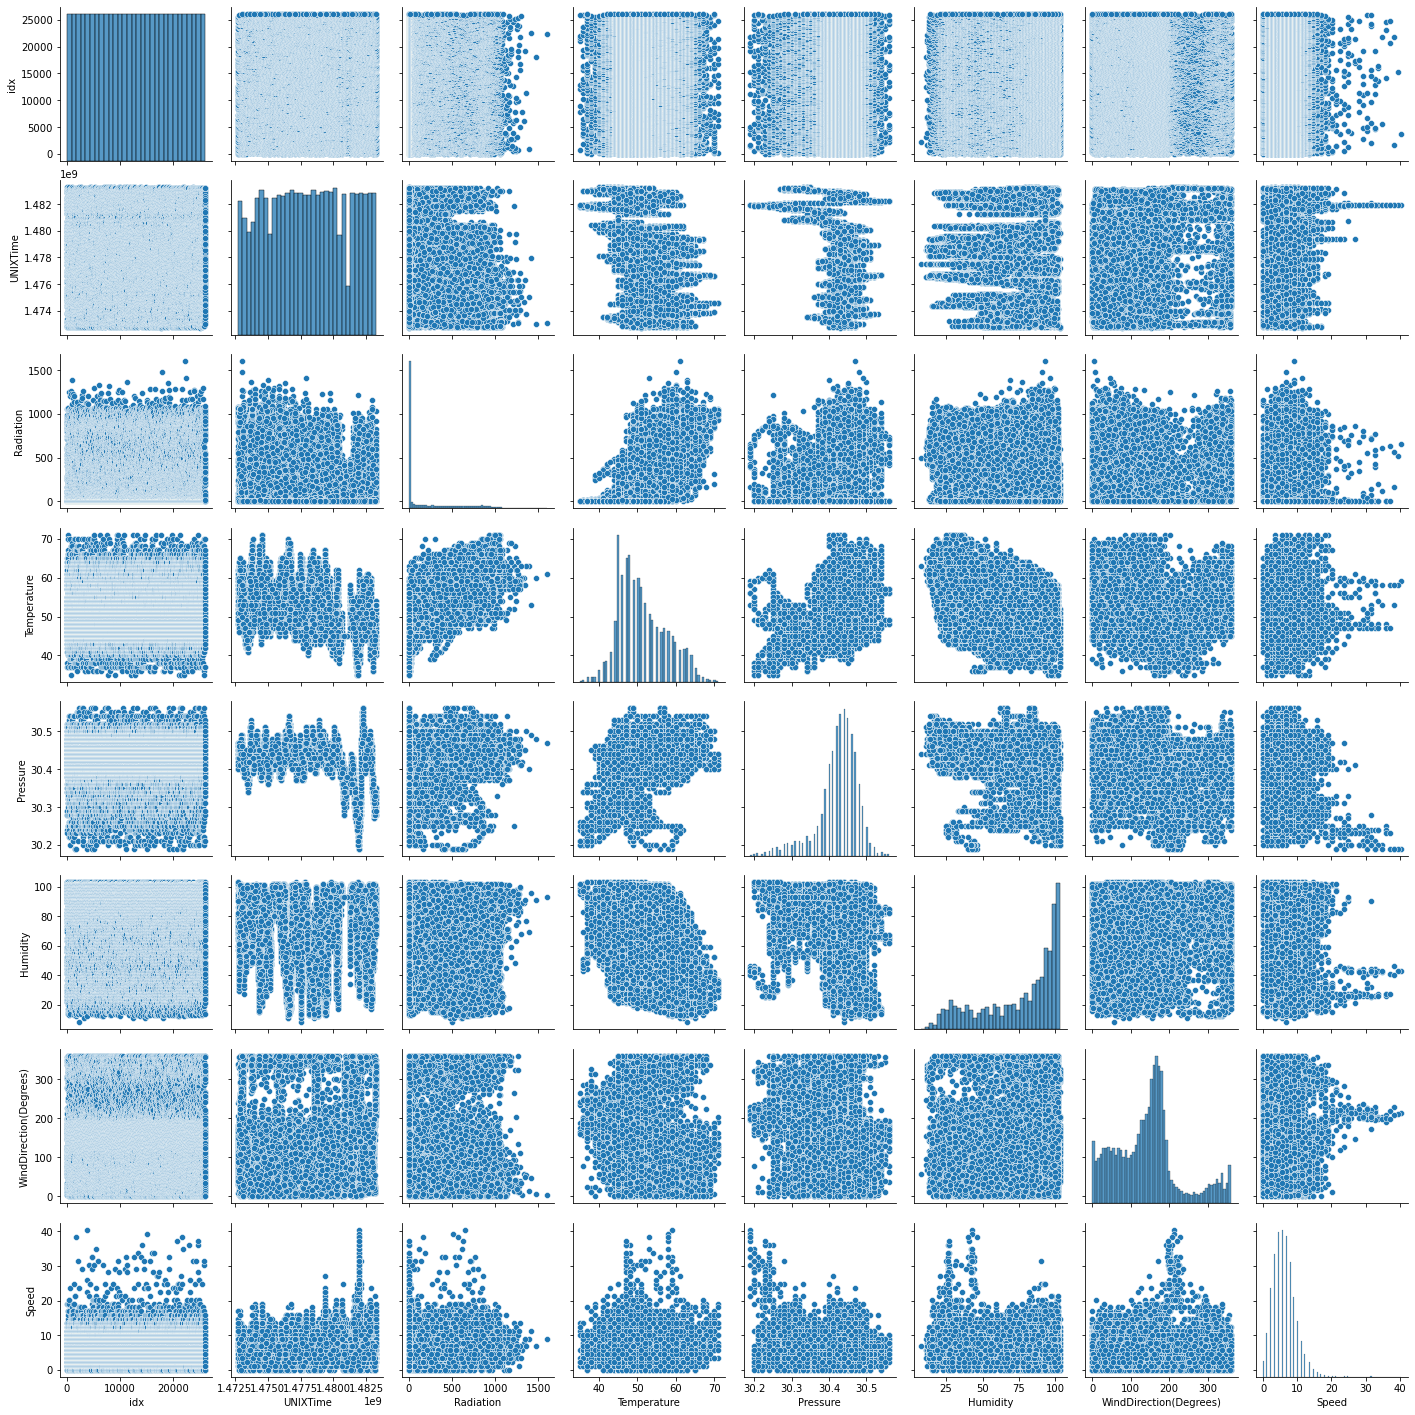

In [12]:
sns.pairplot(train_data)

<AxesSubplot:xlabel='Temperature', ylabel='Pressure'>

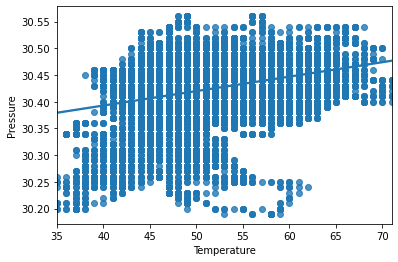

In [15]:
sns.regplot( x="Temperature",y="Pressure",data=train_data)

<AxesSubplot:xlabel='Radiation', ylabel='Pressure'>

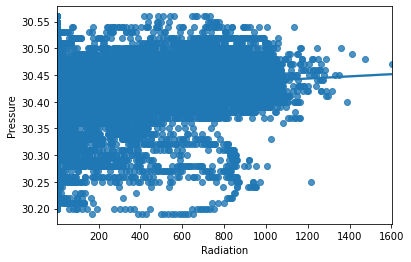

In [16]:
sns.regplot( x="Radiation",y="Pressure",data=train_data)

In [20]:
X=train_data.loc[:,train_data.columns!="Radiation"]

In [21]:
y=train_data["Radiation"]

In [33]:
id_sv = test_data['idx']

In [24]:
from sklearn.model_selection import train_test_split

In [62]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2499904394)

In [63]:
X_train.shape

(19612, 7)

In [64]:
X_test.shape

(6537, 7)

In [65]:
y_test.shape

(6537,)

In [66]:
from sklearn.svm import SVR

In [67]:
reg = SVR(max_iter=10000)

In [68]:
reg.fit(X_train,y_train)

C:\Users\chinamma\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(max_iter=10000)

In [69]:
pred = reg.predict(test_data)

In [70]:
pred

array([2.20450528, 2.20450593, 2.20450654, ..., 2.20912505, 2.20912568,
       2.20912631])

In [71]:
from sklearn.metrics import mean_squared_error


In [72]:
print(mean_squared_error(y_test,pred,squared=False))

378.9103266568578


In [82]:
final = pd.DataFrame()

In [83]:
final['idx']=id_sv

In [84]:
final['Radiation']=pred

In [85]:
pd.DataFrame(final).to_csv('code.csv',index=False)